# Ejercicio 

#### Manning-Strickler

La fórmula de Gauckler-Manning-Strickler (o fórmula de Strickler) relaciona la profundidad del agua y la velocidad del flujo del canal abierto basándose en la suposición de características de flujo unidimensionales (promediadas en sección transversal). La fórmula de Strickler resulta de una gran simplificación de [Navier-Stokes](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations) y las ecuaciones de continuidad. Aunque los enfoques unidimensionales (1d) han sido reemplazados en gran medida por modelos numéricos al menos bidimensionales (2d) en la actualidad, la fórmula de 1d Strickler todavía se usa con frecuencia como una primera aproximación para las condiciones de contorno.

La forma básica de la fórmula de Strickler es:

$$u=k_{st}⋅S^{1/2}⋅R_h^{2/3}$$

u es la velocidad de flujo promediada en sección transversal en (m / s)

$kst$ es el coeficiente de Strickler en ficticio ($m^{1 / 3} / s$) correspondiente a la inversa de la $n_m$ de Manning.

$kst$ ≈ 20 (nm≈ 0.05) para ríos accidentados, complejos y casi naturales

$kst ≈ 90$ (nm≈ 0.011) para canales lisos revestidos de hormigón

$kst ≈ 26 / D_{90}^{1 / 6}$ (aproximación basada en el tamaño de grano D90, donde el 90% de los granos de sedimentos superficiales son más pequeños, según Meyer-Peter y Müller 1948

S es la pendiente de energía hipotética (m / m), que se puede suponer que corresponde a la pendiente del canal para condiciones de flujo constante y uniforme.

Rh es el radio hidráulico en (m)

El radio hidráulico Rh es la relación entre el área mojada A ($\omega$) y el perímetro mojado P. Tanto A como P pueden calcularse en función de la profundidad del agua h y el ancho de la base del canal B. Muchas secciones transversales de canales se pueden aproximar con una forma trapezoidal, donde el ancho de la superficie del agua Bw = B + 2⋅H⋅z (siendo m la pendiente del banco como se indica en la figura siguiente).

![IPython](images/fig2.png)

Por tanto, A y P resultan de las siguientes fórmulas:

$$A=h⋅0.5⋅(b+B)=h⋅(b+h⋅m)$$
$$P=b+2h⋅(m^2+1)^{1/2}$$

Finalmente, la descarga Q (m³ / s) se puede calcular como:

$$Q=u⋅A=kst⋅S^{1/2}⋅R_h^{2/3}⋅A$$

## Hagamos una función que calcule el caudal

Escriba un code que imprima el caudal en función del ancho de la base del canal b, la pendiente del banco m, la profundidad del agua h, la pendiente S y el coeficiente de Strickler kst.

In [2]:
import math

##initial data trapezoidal
b = 450          # bottom channel width (m)
m_l = 0        # left bank slope
m_r = 0        # right bank slope
n_m = 0.025      # Manning's n fondo rugoso
S_0 = 0.00001     # slope cm por kilometro
h = 8           # W. E.

#calculate
area = ((((h * m_l) + (h * m_r) + b) + b) / 2) * h
perimeter = b + (h * (m_l * m_l + 1) ** 0.5) + (h * (m_r * m_r + 1) ** 0.5)
ratio = area / perimeter

discharge = 1/n_m *S_0**(0.5)*ratio**(2./3.)*area
discharge

1779.5364231819797

## Caso Colastiné
![colastine](images/colastine.png)

La pendiente media del río Colastiné es 3.5cm/km y un nivel medio en la zona de estudio es de 9.5 m. Use la siguiente sección transversal (XS3) para determinar el caudal que pasa por la misma. Para esto calcule el área y perímetro de la misma.

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel('data/colastine_seccion.xlsx', names =['distance', 'depth'])
df.head()# visualizar las 5 primeras filas

distance     depth
0         0  9.100000
1        10  8.211396
2        20  7.279909
3        30  7.089138
4        40  6.981790

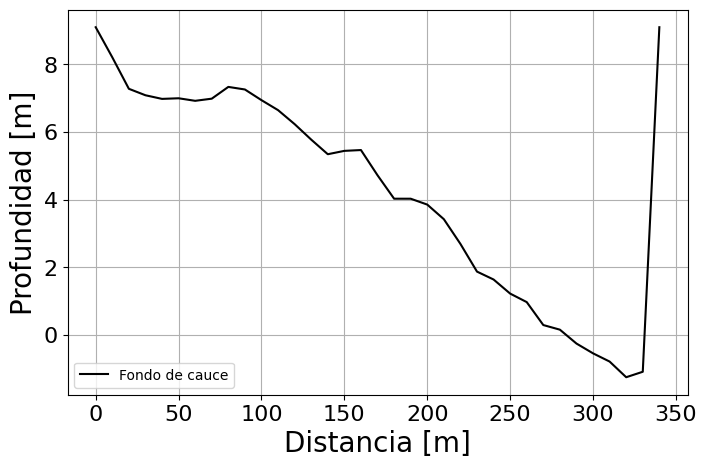

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df['distance'], df['depth'], '-k')
#agreguemos etiquetas
ax.set_ylabel('Profundidad [m]', fontsize=20)
ax.set_xlabel('Distancia [m]', fontsize=20)
#incrementemos el tamaño de la etiqueta
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
#agregamos leyenda
ax.legend(['Fondo de cauce'], loc='best')
ax.grid()

plt.show()

###Algunas ayudas:

$$Perimetro = ((Profundidad_1-Profundidad_0)^2+(Distancia_1-Distancia_0)^2)^{0.5})$$



In [28]:
# Calcular el área con la regla trapezoidal
import numpy as np
area = np.trapz((....)

El área de la sección transversal es: 1410.8734366164965 m²
